## Zuhanó műhold

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
m = 10
g = 9.81
R = 50
h = R+20

In [3]:
def dens(r):
    return np.where(r<h,np.exp(-1/(1-(r/h)**5)),0)*3

In [4]:
N = 500000

r  = 100
θ  = np.pi/2

rp = 0
θp = 0.3
dt = 1e-4

L = m*r**2*θp

x_,y_,v_,e_,r_ = [],[],[],[],[]
for i in range(N):
    vr  = rp
    vt  = r*θp
    v2  = vr**2 + vt**2
    v   = np.sqrt(v2)
    ell = 1e-2*dens(r)*v2
    
    L -= m*r**2 * dt * 0.01
    if L<0:
        L = 0
    θp  = L/(m*r**2) - ell*vt/v2*dt
    rpp = r*θp**2 - g - ell*vr/v2
    
    rp += rpp*dt
    r  += rp*dt
    θ  += θp*dt
    
    x_ += [r*np.cos(θ)]
    y_ += [r*np.sin(θ)]
    v_ += [v]
    e_ += [ell]
    r_ += [r]
    
    if r<R:
        break

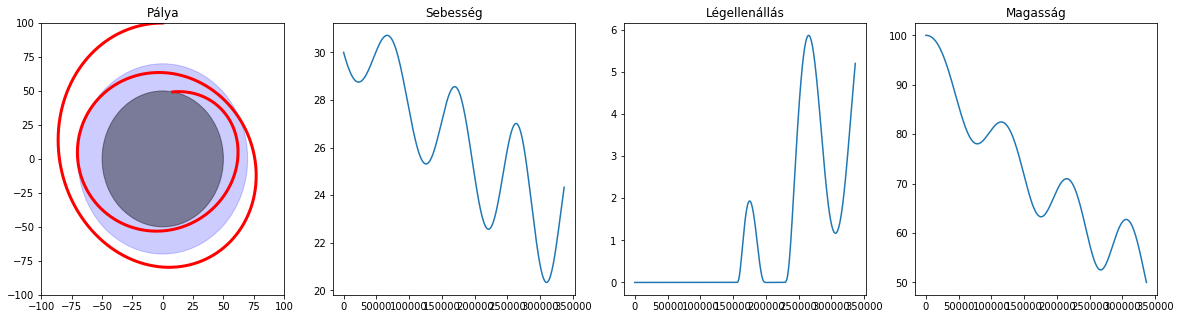

In [5]:
f,ax = subplots(1,4)
f.set_size_inches(20,5)
ax[0].set_xlim([-100,100])
ax[0].set_ylim([-100,100])

ax[0].add_artist(Circle((0,0),h,color='blue',alpha=.2))
ax[0].add_artist(Circle((0,0),R,color='black',alpha=.4))
ax[0].plot(x_,y_,c='r',lw=3)
ax[1].plot(v_)
ax[2].plot(e_)
ax[3].plot(r_)

ax[0].set_title("Pálya")
ax[1].set_title("Sebesség")
ax[2].set_title("Légellenállás")
ax[3].set_title("Magasság");

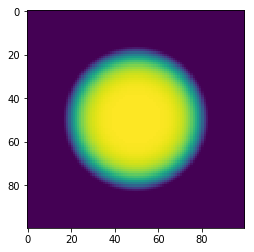

In [6]:
cx,cy = np.meshgrid(np.linspace(-100,100,100),np.linspace(-100,100,100))
fx,fy = cx.flatten(),cy.flatten()
ds    = dens(np.sqrt(fx**2+fy**2)).reshape(100,100)
#contour(cx,cy,ds,6,alpha=.3);
imshow(ds);